# College admissions

In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

read a csv file

In [65]:
df=pd.read_csv('data.csv')
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


### data analysis

In [96]:
def barplot(column):
    df.groupby([column,'in_college']).size().unstack().plot(kind='bar',stacked=True)
    plt.show()

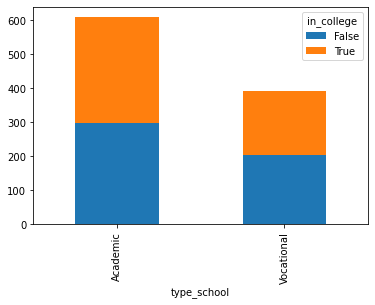

In [97]:
barplot('type_school')

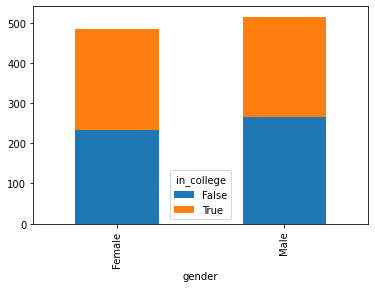

In [98]:
barplot('gender')

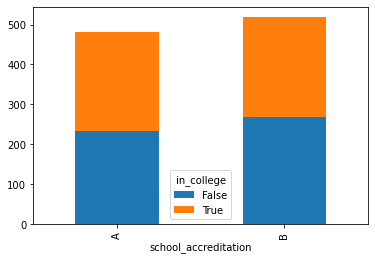

In [99]:
barplot('school_accreditation')

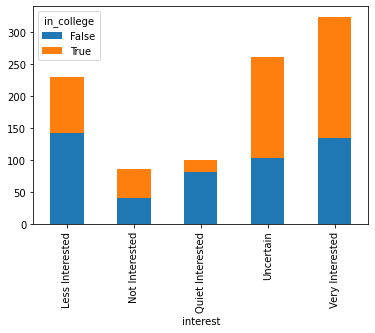

In [100]:
barplot('interest')

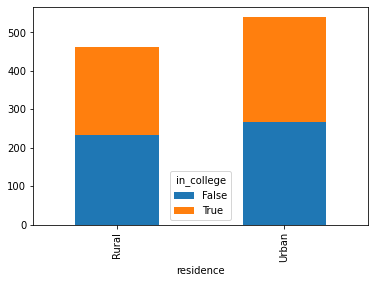

In [101]:
barplot('residence')

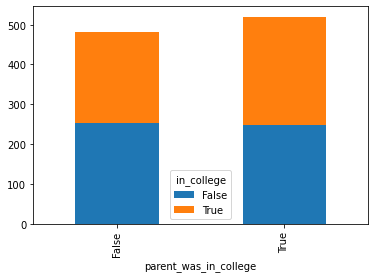

In [102]:
barplot('parent_was_in_college')

In [125]:
def catplotsns(column):
    sns.catplot(x="in_college", y=column, kind="violin", data=df)

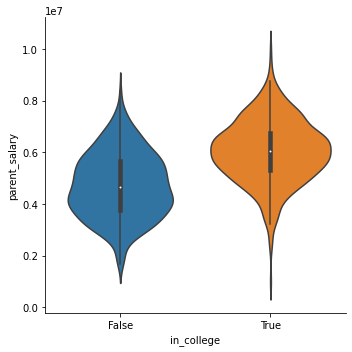

In [127]:
catplotsns("parent_salary")

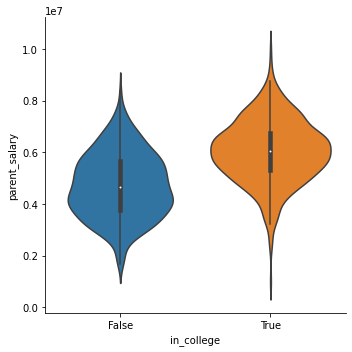

In [128]:
catplotsns("parent_age")

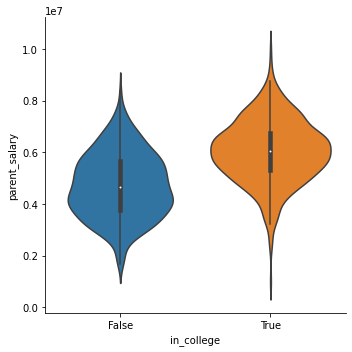

In [129]:
catplotsns("house_area")

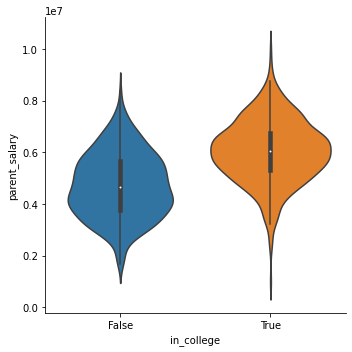

In [131]:
catplotsns("average_grades")

### Training

In [139]:
df.head()

,type_school,school_accreditation,gender,interest,residence,parent_age,parent_salary,house_area,average_grades,parent_was_in_college,in_college
0,Academic,A,Male,Less Interested,Urban,56,6950000,83.0,84.09,False,True
1,Academic,A,Male,Less Interested,Urban,57,4410000,76.8,86.91,False,True
2,Academic,B,Female,Very Interested,Urban,50,6500000,80.6,87.43,False,True
3,Vocational,B,Male,Very Interested,Rural,49,6600000,78.2,82.12,True,True
4,Academic,A,Female,Very Interested,Urban,57,5250000,75.1,86.79,False,False


In [133]:
dfx = df.iloc[:, 0:-1]
dfy = df.iloc[:, -1]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.2, random_state=42)

In [138]:

clf = LogisticRegression(random_state=42).fit(X_train, y_train)
pred = clf.predict(X_test)
clf.score(pred, y_test)

ValueError: could not convert string to float: 'Vocational'